In [1]:
# Import the tools we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings('ignore') 

# Load the CSV file
df = pd.read_csv("Titanic Dataset.csv")
print(f"✓ Dataset loaded: {df.shape}")

# Keep only the columns we need
df = df[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
print(f"✓ Features selected: {df.shape[1]} columns")

# Convert `fare` and `age` to numeric and handle missing values
df[['fare', 'age']] = df[['fare', 'age']].apply(pd.to_numeric, errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df.dropna(subset=['embarked'], inplace=True)
print(f"✓ Missing values handled: {df.isnull().sum().sum()} remaining")

# Convert text columns into numeric dummy variables
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
print(f"✓ Categorical variables encoded")

# Split data into features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

print(f"\n✓ Data preparation complete!")
print(f"X shape: {X.shape} (rows, features)")
print(f"Feature names: {X.columns.tolist()}")
print(f"Survival rate: {y.mean():.2%}")

✓ Dataset loaded: (1309, 14)
✓ Features selected: 8 columns
✓ Missing values handled: 0 remaining
✓ Categorical variables encoded

✓ Data preparation complete!
X shape: (1307, 8) (rows, features)
Feature names: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
Survival rate: 38.10%


In [2]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                    # X and y
    test_size=0.2,           # 20% for testing
    random_state=42          # Use 42 for reproducibility
)

print("✓ Data split complete!")
print(f"Training set: {X_train.shape[0]} passengers ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} passengers ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining survival rate: {y_train.mean():.2%}")
print(f"Testing survival rate: {y_test.mean():.2%}")

✓ Data split complete!
Training set: 1045 passengers (80.0%)
Testing set: 262 passengers (20.0%)

Training survival rate: 37.51%
Testing survival rate: 40.46%


In [3]:
# Create a Decision Tree model with a limited depth
model = DecisionTreeClassifier(
    max_depth=4,           # Limits how deep the tree can grow
    random_state=42        # Controls the model's own randomness
)

# Train the model
model.fit(X_train, y_train)

print("✓ Model trained successfully!")
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")
print(f"Features used: {model.n_features_in_}")

✓ Model trained successfully!
Tree depth: 4
Number of leaves: 16
Features used: 8


In [4]:
# Use the trained model to predict survival on the test features
y_pred = model.predict(X_test)

# Compare predictions to actual answers
accuracy = accuracy_score(y_test, y_pred)

print("✓ Predictions made!")
print(f"Accuracy: {accuracy:.4f}")        
print(f"Accuracy: {accuracy*100:.2f}%")   

# Count how many predictions the model got correct
correct = (y_pred == y_test).sum()
total = len(y_test)
print(f"\nCorrect predictions: {correct} out of {total}")

# Show the first 10 predictions vs actual
comparison = pd.DataFrame({
    'Predicted': y_pred[:10],
    'Actual': y_test[:10].values,
    'Match': ['✓' if p == a else '✗' for p, a in zip(y_pred[:10], y_test[:10])]
})
print(comparison)

✓ Predictions made!
Accuracy: 0.7557
Accuracy: 75.57%

Correct predictions: 198 out of 262
   Predicted  Actual Match
0          0       0     ✓
1          0       1     ✗
2          0       0     ✓
3          0       0     ✓
4          0       0     ✓
5          0       0     ✓
6          0       0     ✓
7          0       0     ✓
8          0       0     ✓
9          1       1     ✓


In [7]:
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

Classification Report:
              precision    recall  f1-score   support

        Died       0.77      0.84      0.80       156
    Survived       0.73      0.63      0.68       106

    accuracy                           0.76       262
   macro avg       0.75      0.74      0.74       262
weighted avg       0.75      0.76      0.75       262



In [8]:
# Create a DataFrame showing each feature and how important it was in the model
importance_df = pd.DataFrame({
    'feature': X.columns,                 # The names of all input features
    'importance': model.feature_importances_  # How much each feature helped the tree make decisions
}).sort_values('importance', ascending=False)  # Sort so the most important features appear first

print("Feature Importance:")
print("=" * 50)
# Print the DataFrame in a clean, readable format (no row numbers)
print(importance_df.to_string(index=False))

# Show the total importance (should be close to 1.0)
print(f"\nTotal importance: {importance_df['importance'].sum():.2f}")

Feature Importance:
   feature  importance
  sex_male    0.600368
    pclass    0.208518
       age    0.086504
      fare    0.055795
     sibsp    0.044713
embarked_Q    0.002774
     parch    0.001328
embarked_S    0.000000

Total importance: 1.00


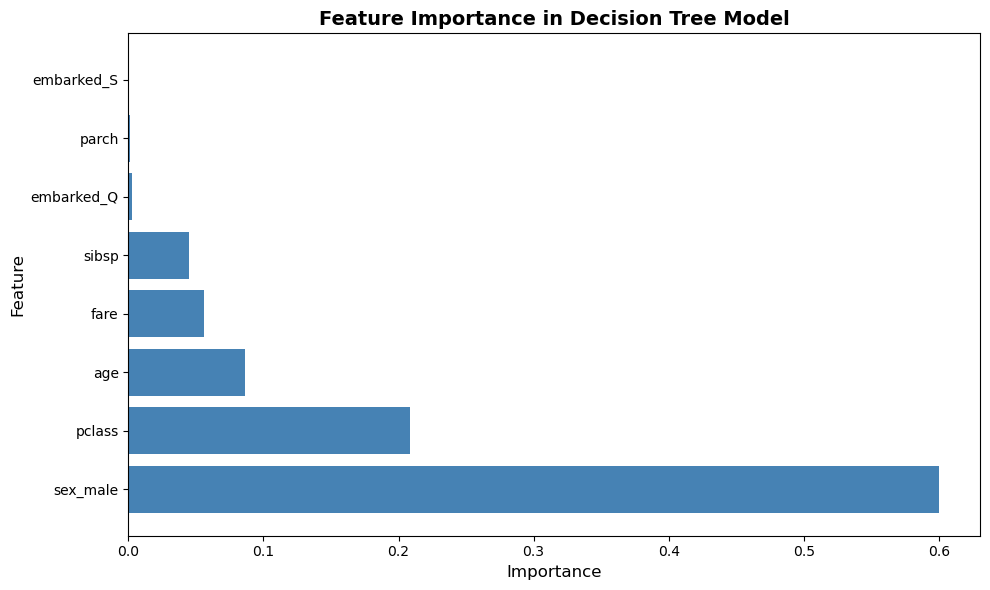

In [9]:
# Create a figure with a specific size (10 inches wide, 6 inches tall)
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.barh(importance_df['feature'], 
         importance_df['importance'], 
         color='steelblue')

# Add labels and title for clarity
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Decision Tree Model', fontsize=14, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
# Example: 3rd class, 25yo male, no family, low fare, embarked at S
# Feature order: [pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]
passenger1 = [[3, 25, 0, 0, 7.25, 1, 0, 1]]

# Make prediction
pred = model.predict(passenger1)
prob = model.predict_proba(passenger1)

print("Scenario 1: Poor young man in 3rd class")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")
print(f"Death probability: {prob[0][0]:.2%}")

Scenario 1: Poor young man in 3rd class
Prediction: Died
Survival probability: 12.92%
Death probability: 87.08%


In [11]:
# 1st class, 25yo female, no family, high fare ($100), embarked at S
# sex_male=0, embarked_Q=0, embarked_S=1
woman_1st = [[1, 25, 0, 0, 100, 0, 0, 1]]

pred = model.predict(woman_1st)
prob = model.predict_proba(woman_1st)
print("Scenario 2: Wealthy young woman in 1st class")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")

Scenario 2: Wealthy young woman in 1st class
Prediction: Survived
Survival probability: 96.07%


In [12]:
# 3rd class, 5yo male, 1 sibling, 2 parents, medium fare ($20), embarked at S
# sex_male=1, embarked_Q=0, embarked_S=1
boy_3rd = [[3, 5, 1, 2, 20, 1, 0, 1]]

pred = model.predict(boy_3rd)
prob = model.predict_proba(boy_3rd)
print("Scenario 3: Young boy with family")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")

Scenario 3: Young boy with family
Prediction: Survived
Survival probability: 100.00%


In [13]:
# 1st class, 65yo male, no family, very high fare ($500), embarked at C
# sex_male=1, embarked_Q=0, embarked_S=0 (C is 0,0)
man_1st_elderly = [[1, 65, 0, 0, 500, 1, 0, 0]]

pred = model.predict(man_1st_elderly)
prob = model.predict_proba(man_1st_elderly)
print("Scenario 4: Wealthy elderly man in 1st class")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")

Scenario 4: Wealthy elderly man in 1st class
Prediction: Died
Survival probability: 10.53%


In [14]:
# TODO: Train models with max_depth of 3, 4, 5, 10, and None (unlimited)
# Compare their training and testing accuracy

depths = [3, 4, 5, 10, None]
results = []

for depth in depths:
    # Train model
    model_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_temp.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, model_temp.predict(X_train))
    test_acc = accuracy_score(y_test, model_temp.predict(X_test))
    
    results.append({
        'max_depth': depth,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'difference': train_acc - test_acc
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False))
print("\nNote: Large difference between train and test accuracy suggests overfitting!")


Model Comparison:
 max_depth  train_accuracy  test_accuracy  difference
       3.0        0.826794       0.763359    0.063435
       4.0        0.828708       0.755725    0.072983
       5.0        0.835407       0.759542    0.075865
      10.0        0.916746       0.751908    0.164838
       NaN        0.969378       0.732824    0.236554

Note: Large difference between train and test accuracy suggests overfitting!
